_Tracing Streamline, Streakline, and Pathline_

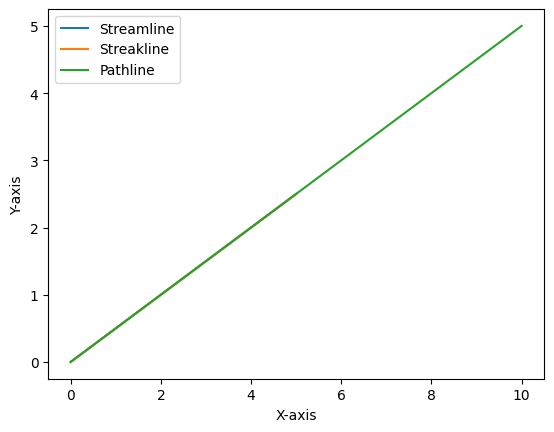

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def velocity_field(t, r):
    # Define the velocity field (modify as needed)
    vx = 1.0  # x-component of velocity
    vy = 0.5  # y-component of velocity

    # ODE describing the motion of a fluid particle
    drdt = [vx, vy]

    return drdt

def trace_streamline(initial_position, time_points):
    # Solve ODE to trace a streamline
    trajectory = odeint(velocity_field, initial_position, time_points)

    return trajectory

def trace_streakline(initial_position, time_interval, time_points):
    # Trace a streakline by integrating multiple streamlines
    streakline_points = []
    for t in np.arange(time_interval[0], time_interval[1], time_points[1] - time_points[0]):
        trajectory = trace_streamline(initial_position, np.linspace(t, t + time_points[-1], len(time_points)))
        streakline_points.extend(trajectory)

    return np.array(streakline_points)

def trace_pathline(initial_position, time_interval, time_points):
    # Trace a pathline by integrating the ODE over a longer time interval
    pathline = odeint(velocity_field, initial_position, np.linspace(time_interval[0], time_interval[1], len(time_points)))

    return pathline

if __name__ == "__main__":
    # Set initial conditions
    initial_position = [0.0, 0.0]

    # Set time points
    time_points = np.linspace(0, 5, 100)

    # Trace a streamline
    streamline = trace_streamline(initial_position, time_points)

    # Trace a streakline
    time_interval_streakline = [0, 5]
    streakline = trace_streakline(initial_position, time_interval_streakline, time_points)

    # Trace a pathline
    time_interval_pathline = [0, 10]
    pathline = trace_pathline(initial_position, time_interval_pathline, time_points)

    # Plot results
    plt.plot(streamline[:, 0], streamline[:, 1], label='Streamline')
    plt.plot(streakline[:, 0], streakline[:, 1], label='Streakline')
    plt.plot(pathline[:, 0], pathline[:, 1], label='Pathline')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()
